# 기본

In [1]:
from paddleocr import PaddleOCR
from paddleocr import draw_ocr
import pandas as pd
import cv2
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np


[2024/01/26 08:51:54] ppocr DEBUG: Namespace(help='==SUPPRESS==', use_gpu=False, use_xpu=False, use_npu=False, ir_optim=True, use_tensorrt=False, min_subgraph_size=15, precision='fp32', gpu_mem=500, gpu_id=0, image_dir=None, page_num=0, det_algorithm='DB', det_model_dir='/Users/kimsy/.paddleocr/whl/det/ml/Multilingual_PP-OCRv3_det_infer', det_limit_side_len=960, det_limit_type='max', det_box_type='quad', det_db_thresh=0.3, det_db_box_thresh=0.6, det_db_unclip_ratio=1.5, max_batch_size=10, use_dilation=False, det_db_score_mode='fast', det_east_score_thresh=0.8, det_east_cover_thresh=0.1, det_east_nms_thresh=0.2, det_sast_score_thresh=0.5, det_sast_nms_thresh=0.2, det_pse_thresh=0, det_pse_box_thresh=0.85, det_pse_min_area=16, det_pse_scale=1, scales=[8, 16, 32], alpha=1.0, beta=1.0, fourier_degree=5, rec_algorithm='SVTR_LCNet', rec_model_dir='/Users/kimsy/.paddleocr/whl/rec/korean/korean_PP-OCRv4_rec_infer', rec_image_inverse=True, rec_image_shape='3, 48, 320', rec_batch_num=6, max_text

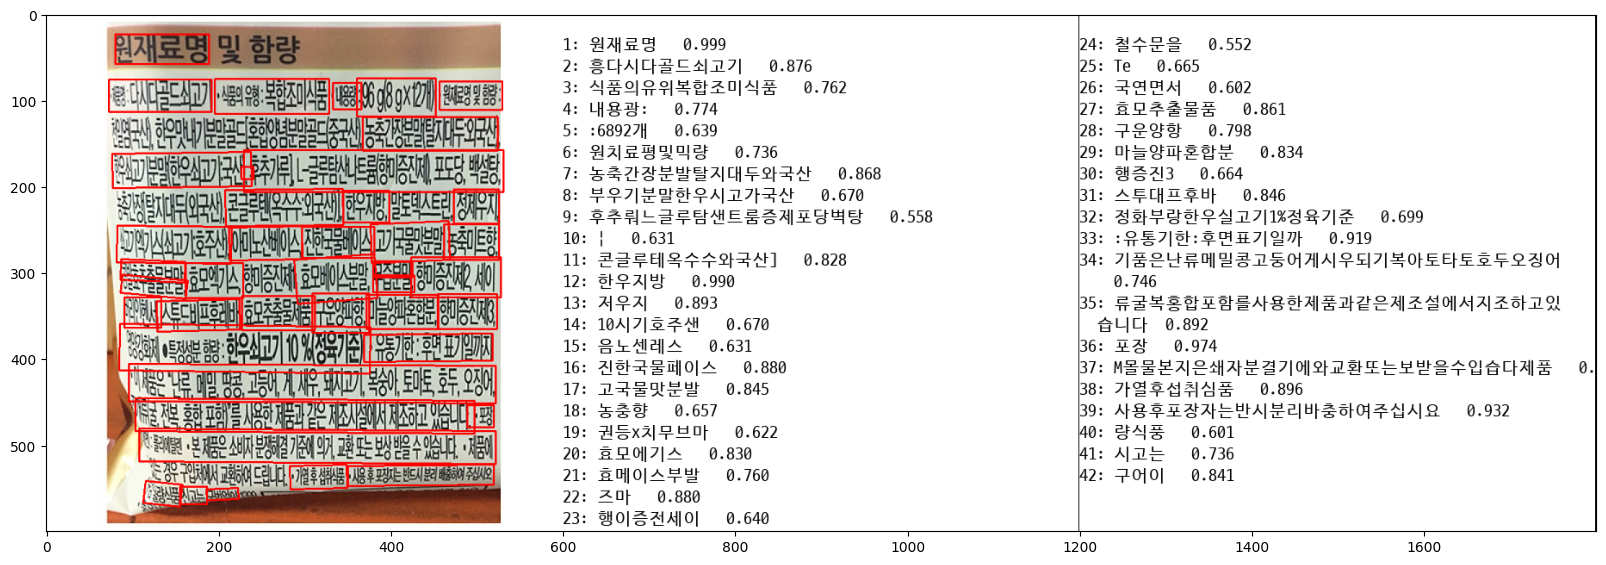

원재료명
흥다시다골드쇠고기
식품의유위복합조미식품
내용광:
:6892개
원치료평및믹량
농축간장분발탈지대두와국산
부우기분말한우시고가국산
후추뤄느글루탐샌트룸증제포당벽탕
|
콘글루테옥수수와국산]
한우지방
저우지
10시기호주샌
음노센레스
진한국물페이스
고국물맛분발
농충향
권등x치무브마
효모에기스
효메이스부발
즈마
행이증전세이
철수문을
Te
국연면서
효모추출물품
구운양항
마늘양파혼합분
행증진3
스투대프후바
정화부랑한우실고기1%정육기준
:유통기한:후면표기일까
기품은난류메밀콩고둥어게시우되기복아토타토호두오징어
류굴복홍합포함를사용한제품과같은제조설에서지조하고있습니다
포장
M몰물본지은쇄자분결기에와교환또는보받을수입습다제품
가열후섭취심품
사용후포장자는반시분리바충하여주십시요
량식풍
시고는
구어이


In [12]:
ocr = PaddleOCR(lang='korean', use_gpu=False, use_angle_cls=True)

img_path = './imgs/rawmaterial1.jpg'
result = ocr.ocr(img_path, cls=True)

# 이미지 시각화
image = Image.open(img_path).convert('RGB')

# 바운딩 박스, 텍스트, 신뢰도 점수 추출
boxes = []
txts = []
scores = []

for line in result:
    for res in line:
        # 신뢰도 점수가 float 타입이 아닌 경우 무시
        if isinstance(res[1][1], float):
            boxes.append(res[0])
            txts.append(res[1][0])
            scores.append(res[1][1])

# 이미지에 결과 그리기
im_show = draw_ocr(image, boxes, txts, scores, font_path='/Users/kimsy/Library/Fonts/D2Coding-Ver1.3.2-20180524-all.ttc')  # 적절한 폰트 파일 경로를 지정하세요.
im_show = Image.fromarray(im_show)

# 결과 이미지 표시
plt.figure(figsize=(20, 18))
plt.imshow(im_show)
plt.show()

# 추출된 텍스트 출력
for txt in txts:
    print(txt)

In [14]:
pd.DataFrame(txts)

0
0                            원재료명
1                       흥다시다골드쇠고기
2                     식품의유위복합조미식품
3                            내용광:
4                          :6892개
5                         원치료평및믹량
6                   농축간장분발탈지대두와국산
7                    부우기분말한우시고가국산
8                후추뤄느글루탐샌트룸증제포당벽탕
9                               |
10                    콘글루테옥수수와국산]
11                           한우지방
12                            저우지
13                        10시기호주샌
14                          음노센레스
15                        진한국물페이스
16                         고국물맛분발
17                            농충향
18                        권등x치무브마
19                          효모에기스
20                         효메이스부발
21                             즈마
22                         행이증전세이
23                           철수문을
24                             Te
25                           국연면서
26                         효모추출물품
27                           구운양항
28                        마늘양파혼합분
29                           행증진3
30                         스투대프후바
31                정화부랑한우실고기1%정육기준
32                   :유통기한:후면표기일까
33     기품은난류메밀콩고둥어게시우되기복아토타토호두오징어
34  류굴복홍합포함를사용한제품과같은제조설에서지조하고있습니다
35                             포장
36     M몰물본지은쇄자분결기에와교환또는보받을수입습다제품
37                        가열후섭취심품
38            사용후포장자는반시분리바충하여주십시요
39                            량식풍
40                            시고는
41                            구어이

In [18]:
from paddleocr import PaddleOCR
from paddleocr import draw_ocr
import pandas as pd
import cv2
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np

# 이미지 전처리 함수 정의
def grayscale(img):
    return cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

def binary(img):
    gray = grayscale(img)
    _, bin_img = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
    return bin_img

# 전처리 방법 목록
preprocesses = {
    "Original": lambda img: cv2.cvtColor(img, cv2.COLOR_BGR2RGB),
    "Grayscale": grayscale,
    "Binary": binary
}

# OCR 인스턴스 생성
ocr = PaddleOCR(lang='korean', use_gpu=False, use_angle_cls=True)

# 이미지 경로
img_path = './imgs/rawmaterial1.jpg'

# 원본 이미지 로드
original_img = cv2.imread(img_path)

# 결과를 저장할 리스트 초기화
results = []

# 각 전처리 방법에 대한 OCR 실행
for name, preprocess in preprocesses.items():
    # 전처리 이미지
    preprocessed_img = preprocess(original_img.copy())

    # 전처리된 이미지를 RGB로 변환 (PaddleOCR은 RGB 이미지를 기대합니다)
    if name != "Original":
        preprocessed_img = cv2.cvtColor(preprocessed_img, cv2.COLOR_GRAY2RGB)

    # OCR 실행
    ocr_result = ocr.ocr(preprocessed_img, cls=True)

    # 추출된 텍스트
    txts = [line[1][0] for line in ocr_result[0]]

    # 결과 저장
    results.append({
        "Preprocessing": name,
        "Extracted Texts": " ".join(txts)
    })

# 결과를 데이터프레임으로 변환
df_results = pd.DataFrame(results)

# 결과 출력
print(df_results)


[2024/01/26 09:34:21] ppocr DEBUG: Namespace(help='==SUPPRESS==', use_gpu=False, use_xpu=False, use_npu=False, ir_optim=True, use_tensorrt=False, min_subgraph_size=15, precision='fp32', gpu_mem=500, gpu_id=0, image_dir=None, page_num=0, det_algorithm='DB', det_model_dir='/Users/kimsy/.paddleocr/whl/det/ml/Multilingual_PP-OCRv3_det_infer', det_limit_side_len=960, det_limit_type='max', det_box_type='quad', det_db_thresh=0.3, det_db_box_thresh=0.6, det_db_unclip_ratio=1.5, max_batch_size=10, use_dilation=False, det_db_score_mode='fast', det_east_score_thresh=0.8, det_east_cover_thresh=0.1, det_east_nms_thresh=0.2, det_sast_score_thresh=0.5, det_sast_nms_thresh=0.2, det_pse_thresh=0, det_pse_box_thresh=0.85, det_pse_min_area=16, det_pse_scale=1, scales=[8, 16, 32], alpha=1.0, beta=1.0, fourier_degree=5, rec_algorithm='SVTR_LCNet', rec_model_dir='/Users/kimsy/.paddleocr/whl/rec/korean/korean_PP-OCRv4_rec_infer', rec_image_inverse=True, rec_image_shape='3, 48, 320', rec_batch_num=6, max_text

In [19]:
df_results

Preprocessing                                    Extracted Texts
0      Original  원재료명 흥다시다골드쇠고 식품의유위복합조미식품 내용광: :688X개 원치료평및믹량 ...
1     Grayscale  원재료명 및 을 평다시다골드쇠고기 '식품의유위복합조미식품 내용광: :689개 원치료...
2        Binary  원지 謝웨복합조미식품 4:608gX께 완명몇意: - 주역국선한문골디혼합양넘분말골대중...

[2024/01/29 20:53:24] ppocr DEBUG: Namespace(help='==SUPPRESS==', use_gpu=False, use_xpu=False, use_npu=False, ir_optim=True, use_tensorrt=False, min_subgraph_size=15, precision='fp32', gpu_mem=500, gpu_id=0, image_dir=None, page_num=0, det_algorithm='DB', det_model_dir='/Users/kimsy/.paddleocr/whl/det/ml/Multilingual_PP-OCRv3_det_infer', det_limit_side_len=960, det_limit_type='max', det_box_type='quad', det_db_thresh=0.3, det_db_box_thresh=0.6, det_db_unclip_ratio=1.5, max_batch_size=10, use_dilation=False, det_db_score_mode='fast', det_east_score_thresh=0.8, det_east_cover_thresh=0.1, det_east_nms_thresh=0.2, det_sast_score_thresh=0.5, det_sast_nms_thresh=0.2, det_pse_thresh=0, det_pse_box_thresh=0.85, det_pse_min_area=16, det_pse_scale=1, scales=[8, 16, 32], alpha=1.0, beta=1.0, fourier_degree=5, rec_algorithm='SVTR_LCNet', rec_model_dir='/Users/kimsy/.paddleocr/whl/rec/korean/korean_PP-OCRv4_rec_infer', rec_image_inverse=True, rec_image_shape='3, 48, 320', rec_batch_num=6, max_text

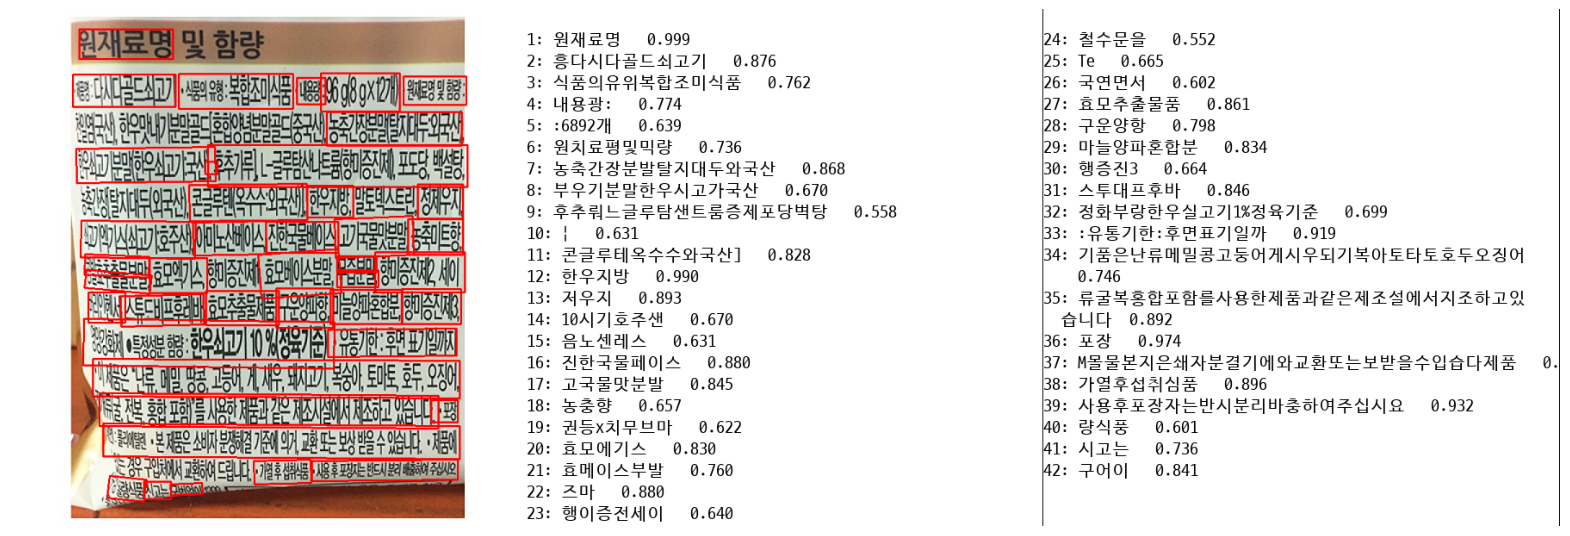

[2024/01/29 20:53:37] ppocr DEBUG: dt_boxes num : 52, elapsed : 0.25460314750671387
[2024/01/29 20:53:37] ppocr DEBUG: cls num  : 52, elapsed : 0.22411680221557617
[2024/01/29 20:53:49] ppocr DEBUG: rec_res num  : 52, elapsed : 11.445267915725708
[2024/01/29 20:53:49] ppocr DEBUG: dt_boxes num : 53, elapsed : 0.25049304962158203
[2024/01/29 20:53:49] ppocr DEBUG: cls num  : 53, elapsed : 0.23008942604064941
[2024/01/29 20:54:01] ppocr DEBUG: rec_res num  : 53, elapsed : 11.88245415687561
[2024/01/29 20:54:01] ppocr DEBUG: dt_boxes num : 34, elapsed : 0.2505679130554199
[2024/01/29 20:54:02] ppocr DEBUG: cls num  : 34, elapsed : 0.14806556701660156
[2024/01/29 20:54:10] ppocr DEBUG: rec_res num  : 34, elapsed : 8.781422853469849


Original                        Grayscale  \
0                             원재료명                             원재료명   
1                         흥다시다골드쇠고                                및   
2                      식품의유위복합조미식품                                을   
3                             내용광:                        평다시다골드쇠고기   
4                           :688X개                     '식품의유위복합조미식품   
5                          원치료평및믹량                             내용광:   
6                    농축간장분발탈지대두외국산                            :689개   
7                      유기분말한우시고기국산                          원치료평및믹량   
8                 후추뤄느글루탐샌트룸증제포당벽탕                    농축간장분발탈지대두외국산   
9                       느구성탈시대뒤와국산                        유기분밀한우기국산   
10                     콘글루렌옥수수와국산]             후카루글루탐샌니트룸콩히증즈제포당벽슬탕   
11                            한우지방                       콘글루테옥수수와국산   
12                             저우지                             한우지방   
13                       1끼스시쇠기호주겐                              저우지   
14                           음노센레스                           1기시기호샌   
15                         진한국물비이스                             음노샌스   
16                           고국물분발                          진한국물페이스   
17                             농충향                           고국물맛분발   
18                         권등호추무부막                              농충향   
19                           효모에기스                          권등x치무브마   
20                          효메이스부발                            효모에기스   
21                              즈마                           효메이스부발   
22                          행이증전세이                               즈마   
23                              Te                           행증전제세이   
24                            국연면서                               Te   
25                          효모추출물품                              구번서   
26                            구운양항                           효모추출물품   
27                          마늘양혼합분                             구운양항   
28                            행증진3                           마늘양혼합분   
29                정회특생분방한우식기0%정육/준                           행미증진제3   
30                   :유통기한:후면표기일까지                   동정분향한우시기0%정육/준   
31                               -                    :유통기한:후면표기일까지   
32      기품은난류메밀콩고둥어게시우되기복아토타토호두오지어         품은류메밀콩고등어게새우찌기복숭아토마토호두오어   
33  류굴복홍합포함'를사용한제품과같은제조설에서제조하고있습니다  류굴전복홍합포함'를사용한제품과같은서죠설에서시조하고있습니다   
34                              포장                              다포장   
35   한면본자은쇄자분쟁결기준의거교환또는보상받을수입습니나서품  연물면본재품은쇄자분결기준의거교환포는보방받을수이습니다서품예   
36                동는경우구입차서교환하여드럽니다                 동는경우구입차서교환하여드럽니다   
37                         가열후섭취심품                          가열후섭취식품   
38            사용후포장자는반드시분리바충하어주십시오             사용후포장자는반드시분리바충하어주십시오   
39                             랑식풍                              신교는   
40                             신고는                              OAT   
41                             NaN                                대   
42                             NaN                               오는   

                             Binary  
0                                원지  
1                          謝웨복합조미식품  
2                          4:608gX께  
3                             완명몇意:  
4                                 -  
5   주역국선한문골디혼합양넘분말골대중국귄농축긴장분말탈지두의국산  
6     렌고기분맥한우까국샌후주뤼니국루탐샌트르행증진제포도당맥슬  
7                         긴쟁탈지대뒤와국샌  
8                       콘글루엔옥수수의국샌]  
9              이미노샌스잔한국바이스고국물분발농취트향  
10                            효모액기스  
11                            행미증진제  
12                          효매이시스분발  
13                               즈마  
14                             THLe  
15                        고연서스투대프후에  
16                           효모추출물품  
17                               '공  
18                          마늘양파혼합분  
19                             행증전3  
20          은난류대밀콩고등어거새우지기복아토토호두오쬐어  
21  뒷굴전복홍합포함'를사용한제품과같은저지설서제조하고있습니다땅  
22                 열후퓨풍사용후모

In [1]:
from paddleocr import PaddleOCR
from paddleocr import draw_ocr
import pandas as pd
import cv2
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np

# 이미지 전처리 함수 정의
def grayscale(img):
    return cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

def binary(img):
    gray = grayscale(img)
    _, bin_img = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
    return bin_img

# 전처리 방법 목록
preprocesses = {
    "Original": lambda img: cv2.cvtColor(img, cv2.COLOR_BGR2RGB),
    "Grayscale": grayscale,
    "Binary": binary
}

# 이미지 경로
img_path = './imgs/rawmaterial1.jpg'
# OCR 인스턴스 생성
ocr = PaddleOCR(lang='korean', use_gpu=False, use_angle_cls=True)
result = ocr.ocr(img_path, cls=True)
image = Image.open(img_path).convert('RGB')

# 바운딩 박스, 텍스트, 신뢰도 점수 추출
boxes = []
txts = []
scores = []

# 바운딩 박스, 텍스트, 신뢰도 점수 추출 및 이미지에 결과 그리기
for line in result:
    for res in line:
        if isinstance(res[1][1], float):
            boxes.append(res[0])
            txts.append(res[1][0])
            scores.append(res[1][1])

image = Image.open(img_path).convert('RGB')
im_show = draw_ocr(image, boxes, txts, scores, font_path='/Users/kimsy/Library/Fonts/D2Coding-Ver1.3.2-20180524-all.ttc')
im_show = Image.fromarray(im_show)

plt.figure(figsize=(20, 18))
plt.imshow(im_show)
plt.axis('off')
plt.show()


# 원본 이미지 로드 및 전처리
original_img = cv2.imread(img_path)
if original_img is None:
    raise FileNotFoundError(f"파일 '{img_path}'이(가) 존재하지 않습니다.")
sharp_img = cv2.cvtColor(original_img, cv2.COLOR_BGR2RGB)
image = Image.fromarray(sharp_img) 


# 결과를 저장할 딕셔너리 초기화
results = {"Original": [], "Grayscale": [], "Binary": []}

# 각 전처리 방법에 대한 OCR 실행
for name, preprocess in preprocesses.items():
    # 전처리 이미지
    preprocessed_img = preprocess(original_img.copy())

    # 전처리된 이미지를 RGB로 변환
    if name != "Original":
        preprocessed_img = cv2.cvtColor(preprocessed_img, cv2.COLOR_GRAY2RGB)

    # OCR 실행
    ocr_result = ocr.ocr(preprocessed_img, cls=True)

    # 추출된 텍스트
    txts = [line[1][0] for line in ocr_result[0]]

    # 결과 저장
    results[name] = txts

# 결과를 데이터프레임으로 변환
df_results = pd.DataFrame(dict([(k, pd.Series(v)) for k, v in results.items()]))


# 결과 출력
df_results


[2024/01/29 21:08:07] ppocr DEBUG: Namespace(help='==SUPPRESS==', use_gpu=False, use_xpu=False, use_npu=False, ir_optim=True, use_tensorrt=False, min_subgraph_size=15, precision='fp32', gpu_mem=500, gpu_id=0, image_dir=None, page_num=0, det_algorithm='DB', det_model_dir='/Users/kimsy/.paddleocr/whl/det/ml/Multilingual_PP-OCRv3_det_infer', det_limit_side_len=960, det_limit_type='max', det_box_type='quad', det_db_thresh=0.3, det_db_box_thresh=0.6, det_db_unclip_ratio=1.5, max_batch_size=10, use_dilation=False, det_db_score_mode='fast', det_east_score_thresh=0.8, det_east_cover_thresh=0.1, det_east_nms_thresh=0.2, det_sast_score_thresh=0.5, det_sast_nms_thresh=0.2, det_pse_thresh=0, det_pse_box_thresh=0.85, det_pse_min_area=16, det_pse_scale=1, scales=[8, 16, 32], alpha=1.0, beta=1.0, fourier_degree=5, rec_algorithm='SVTR_LCNet', rec_model_dir='/Users/kimsy/.paddleocr/whl/rec/korean/korean_PP-OCRv4_rec_infer', rec_image_inverse=True, rec_image_shape='3, 48, 320', rec_batch_num=6, max_text

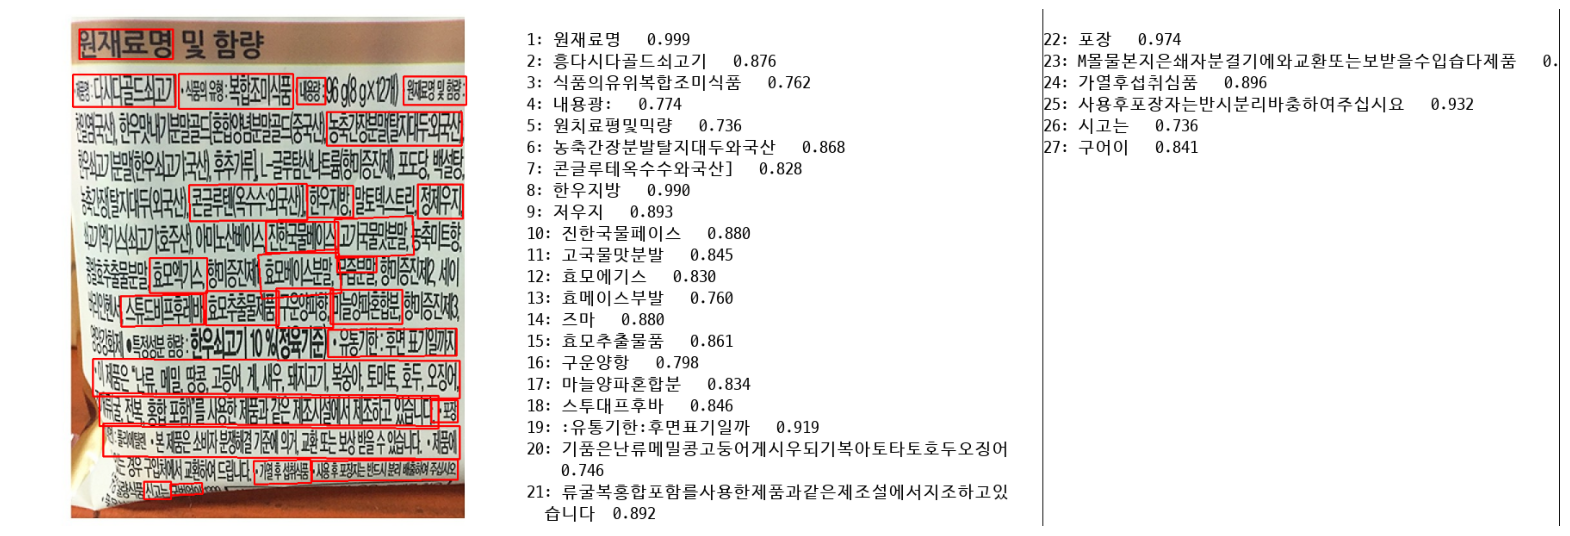

[2024/01/29 21:08:21] ppocr DEBUG: dt_boxes num : 52, elapsed : 0.25829076766967773
[2024/01/29 21:08:21] ppocr DEBUG: cls num  : 52, elapsed : 0.22913908958435059
[2024/01/29 21:08:33] ppocr DEBUG: rec_res num  : 52, elapsed : 11.677846193313599
[2024/01/29 21:08:33] ppocr DEBUG: dt_boxes num : 53, elapsed : 0.2580549716949463
[2024/01/29 21:08:33] ppocr DEBUG: cls num  : 53, elapsed : 0.2308647632598877
[2024/01/29 21:08:45] ppocr DEBUG: rec_res num  : 53, elapsed : 11.863761186599731
[2024/01/29 21:08:45] ppocr DEBUG: dt_boxes num : 34, elapsed : 0.24834108352661133
[2024/01/29 21:08:45] ppocr DEBUG: cls num  : 34, elapsed : 0.14842796325683594
[2024/01/29 21:08:54] ppocr DEBUG: rec_res num  : 34, elapsed : 8.737748146057129


Original                        Grayscale  \
0                             원재료명                             원재료명   
1                         흥다시다골드쇠고                                및   
2                      식품의유위복합조미식품                        평다시다골드쇠고기   
3                             내용광:                     '식품의유위복합조미식품   
4                           :688X개                             내용광:   
5                          원치료평및믹량                            :689개   
6                    농축간장분발탈지대두외국산                          원치료평및믹량   
7                      유기분말한우시고기국산                    농축간장분발탈지대두외국산   
8                      콘글루렌옥수수와국산]                        유기분밀한우기국산   
9                             한우지방                       콘글루테옥수수와국산   
10                             저우지                             한우지방   
11                         진한국물비이스                              저우지   
12                           고국물분발                             음노샌스   
13                           효모에기스                          진한국물페이스   
14                          효메이스부발                           고국물맛분발   
15                              즈마                            효모에기스   
16                          효모추출물품                           효메이스부발   
17                            구운양항                               즈마   
18                          마늘양혼합분                           효모추출물품   
19                정회특생분방한우식기0%정육/준                             구운양항   
20                   :유통기한:후면표기일까지                           마늘양혼합분   
21                               -                           행미증진제3   
22      기품은난류메밀콩고둥어게시우되기복아토타토호두오지어                   동정분향한우시기0%정육/준   
23  류굴복홍합포함'를사용한제품과같은제조설에서제조하고있습니다                    :유통기한:후면표기일까지   
24                              포장         품은류메밀콩고등어게새우찌기복숭아토마토호두오어   
25   한면본자은쇄자분쟁결기준의거교환또는보상받을수입습니나서품  류굴전복홍합포함'를사용한제품과같은서죠설에서시조하고있습니다   
26                동는경우구입차서교환하여드럽니다                              다포장   
27                         가열후섭취심품  연물면본재품은쇄자분결기준의거교환포는보방받을수이습니다서품예   
28            사용후포장자는반드시분리바충하어주십시오                 동는경우구입차서교환하여드럽니다   
29                             신고는                          가열후섭취식품   
30                             NaN             사용후포장자는반드시분리바충하어주십시오   
31                             NaN                              신교는   
32                             NaN                              OAT   
33                             NaN                                대   

                             Binary  
0                          謝웨복합조미식품  
1                         긴쟁탈지대뒤와국샌  
2                       콘글루엔옥수수의국샌]  
3                             효모액기스  
4                             행미증진제  
5                           효매이시스분발  
6                                즈마  
7                              THLe  
8                            효모추출물품  
9                                '공  
10                          마늘양파혼합분  
11          은난류대밀콩고등어거새우지기복아토토호두오쬐어  
12  뒷굴전복홍합포함'를사용한제품과같은저지설서제조하고있습니다땅  
13                              NaN  
14                              NaN  
15                              NaN  
16                              NaN  
17                              NaN  
18                              NaN  
19                              NaN  
20                              NaN  
21                              NaN  
22                              NaN  
23                              NaN  
24                              NaN  
25                              NaN  
26                              NaN  
27                              NaN  
28                              NaN  
29                              NaN  
30                              NaN  
31                              NaN  
32                              NaN  
33                              NaN

In [4]:
from paddleocr import PaddleOCR
from paddleocr import draw_ocr
import pandas as pd
import cv2
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np

# 이미지 전처리 함수 정의
def grayscale(img):
    return cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

def binary(img):
    gray = grayscale(img)
    _, bin_img = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
    return bin_img

# 전처리 방법 목록
preprocesses = {
    "Original": lambda img: cv2.cvtColor(img, cv2.COLOR_BGR2RGB),
    "Grayscale": grayscale,
    "Binary": binary
}

# 이미지 경로
img_path = './imgs/rawmaterial1.jpg'
# OCR 인스턴스 생성
ocr = PaddleOCR(lang='korean', use_gpu=False, use_angle_cls=True,  drop_score=0.7)
result = ocr.ocr(img_path, cls=True)
image = Image.open(img_path).convert('RGB')

# 바운딩 박스, 텍스트, 신뢰도 점수 추출
boxes = []
txts = []
scores = []

# 바운딩 박스, 텍스트, 신뢰도 점수 추출 및 이미지에 결과 그리기
for line in result:
    for res in line:
        if isinstance(res[1][1], float):
            boxes.append(res[0])
            txts.append(res[1][0])
            scores.append(res[1][1])

image = Image.open(img_path).convert('RGB')
im_show = draw_ocr(image, boxes, txts, scores, font_path='/Users/kimsy/Library/Fonts/D2Coding-Ver1.3.2-20180524-all.ttc')
im_show = Image.fromarray(im_show)

plt.figure(figsize=(20, 18))
plt.imshow(im_show)
plt.axis('off')
plt.show()


# 원본 이미지 로드 및 전처리
original_img = cv2.imread(img_path)
if original_img is None:
    raise FileNotFoundError(f"파일 '{img_path}'이(가) 존재하지 않습니다.")
sharp_img = cv2.cvtColor(original_img, cv2.COLOR_BGR2RGB)
image = Image.fromarray(sharp_img) 


# 결과를 저장할 딕셔너리 초기화
results = {"Original": [], "Grayscale": [], "Binary": []}

# 각 전처리 방법에 대한 OCR 실행
for name, preprocess in preprocesses.items():
    # 전처리 이미지
    preprocessed_img = preprocess(original_img.copy())

    # 전처리된 이미지를 RGB로 변환
    if name != "Original":
        preprocessed_img = cv2.cvtColor(preprocessed_img, cv2.COLOR_GRAY2RGB)

    # OCR 실행
    ocr_result = ocr.ocr(preprocessed_img, cls=True)

    # 추출된 텍스트
    txts = [line[1][0] for line in ocr_result[0]]

    # 결과 저장
    results[name] = txts

# 결과를 데이터프레임으로 변환
df_results = pd.DataFrame(dict([(k, pd.Series(v)) for k, v in results.items()]))


# 결과 출력
df_results


[2024/01/29 21:19:36] ppocr DEBUG: Namespace(help='==SUPPRESS==', use_gpu=False, use_xpu=False, use_npu=False, ir_optim=True, use_tensorrt=False, min_subgraph_size=15, precision='fp32', gpu_mem=500, gpu_id=0, image_dir=None, page_num=0, det_algorithm='DB', det_model_dir='/Users/kimsy/.paddleocr/whl/det/ml/Multilingual_PP-OCRv3_det_infer', det_limit_side_len=960, det_limit_type='max', det_box_type='quad', det_db_thresh=0.3, det_db_box_thresh=0.6, det_db_unclip_ratio=1.5, max_batch_size=10, use_dilation=False, det_db_score_mode='fast', det_east_score_thresh=0.8, det_east_cover_thresh=0.1, det_east_nms_thresh=0.2, det_sast_score_thresh=0.5, det_sast_nms_thresh=0.2, det_pse_thresh=0, det_pse_box_thresh=0.85, det_pse_min_area=16, det_pse_scale=1, scales=[8, 16, 32], alpha=1.0, beta=1.0, fourier_degree=5, rec_algorithm='SVTR_LCNet', rec_model_dir='/Users/kimsy/.paddleocr/whl/rec/korean/korean_PP-OCRv4_rec_infer', rec_image_inverse=True, rec_image_shape='3, 48, 320', rec_batch_num=6, max_text

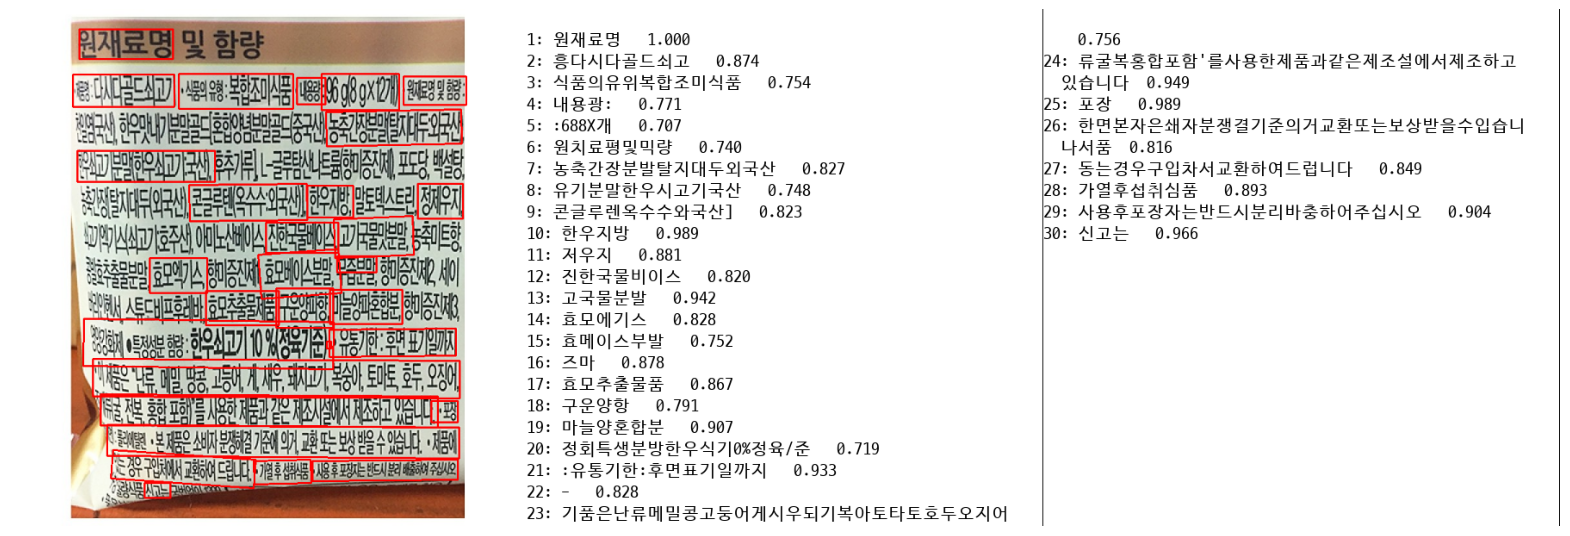

[2024/01/29 21:19:50] ppocr DEBUG: dt_boxes num : 52, elapsed : 0.26315975189208984
[2024/01/29 21:19:50] ppocr DEBUG: cls num  : 52, elapsed : 0.22925734519958496
[2024/01/29 21:20:01] ppocr DEBUG: rec_res num  : 52, elapsed : 11.509236812591553
Processing: Grayscale
[2024/01/29 21:20:02] ppocr DEBUG: dt_boxes num : 53, elapsed : 0.2504591941833496
[2024/01/29 21:20:02] ppocr DEBUG: cls num  : 53, elapsed : 0.23246550559997559
[2024/01/29 21:20:14] ppocr DEBUG: rec_res num  : 53, elapsed : 11.804856061935425


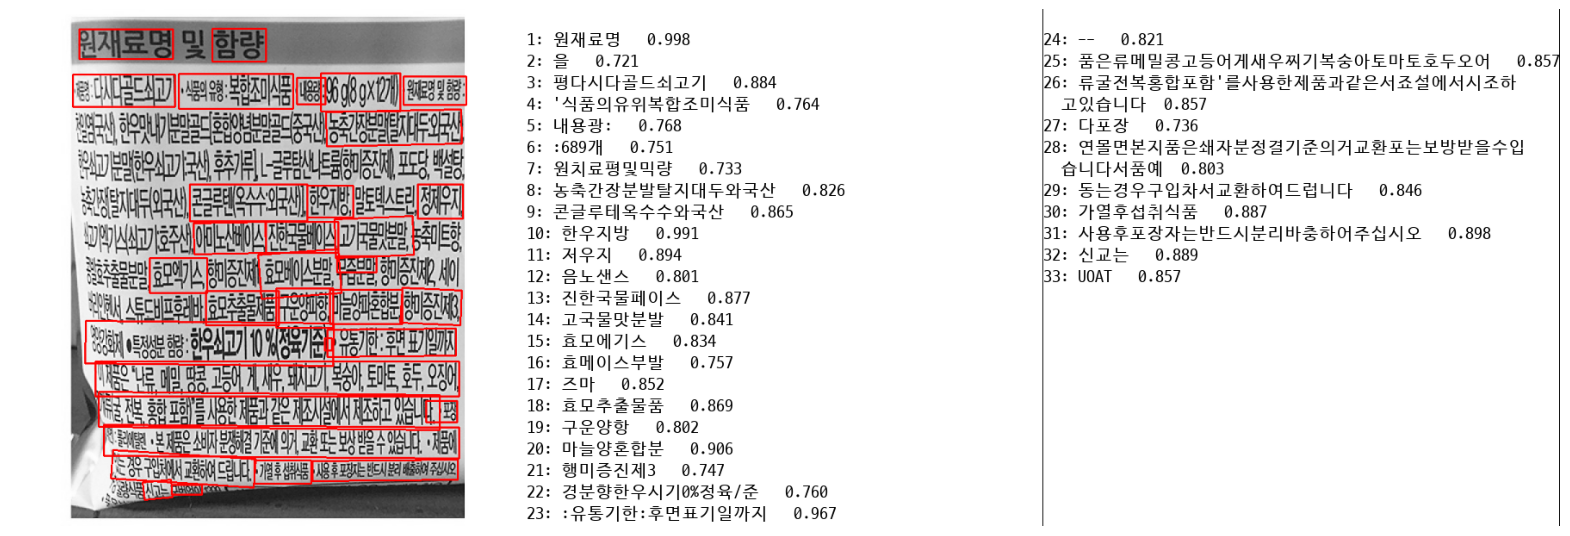

[2024/01/29 21:20:14] ppocr DEBUG: dt_boxes num : 53, elapsed : 0.2558891773223877
[2024/01/29 21:20:14] ppocr DEBUG: cls num  : 53, elapsed : 0.22756099700927734
[2024/01/29 21:20:26] ppocr DEBUG: rec_res num  : 53, elapsed : 11.83818006515503
Processing: Binary
[2024/01/29 21:20:27] ppocr DEBUG: dt_boxes num : 33, elapsed : 0.24817204475402832
[2024/01/29 21:20:27] ppocr DEBUG: cls num  : 33, elapsed : 0.14146900177001953
[2024/01/29 21:20:35] ppocr DEBUG: rec_res num  : 33, elapsed : 8.351110935211182


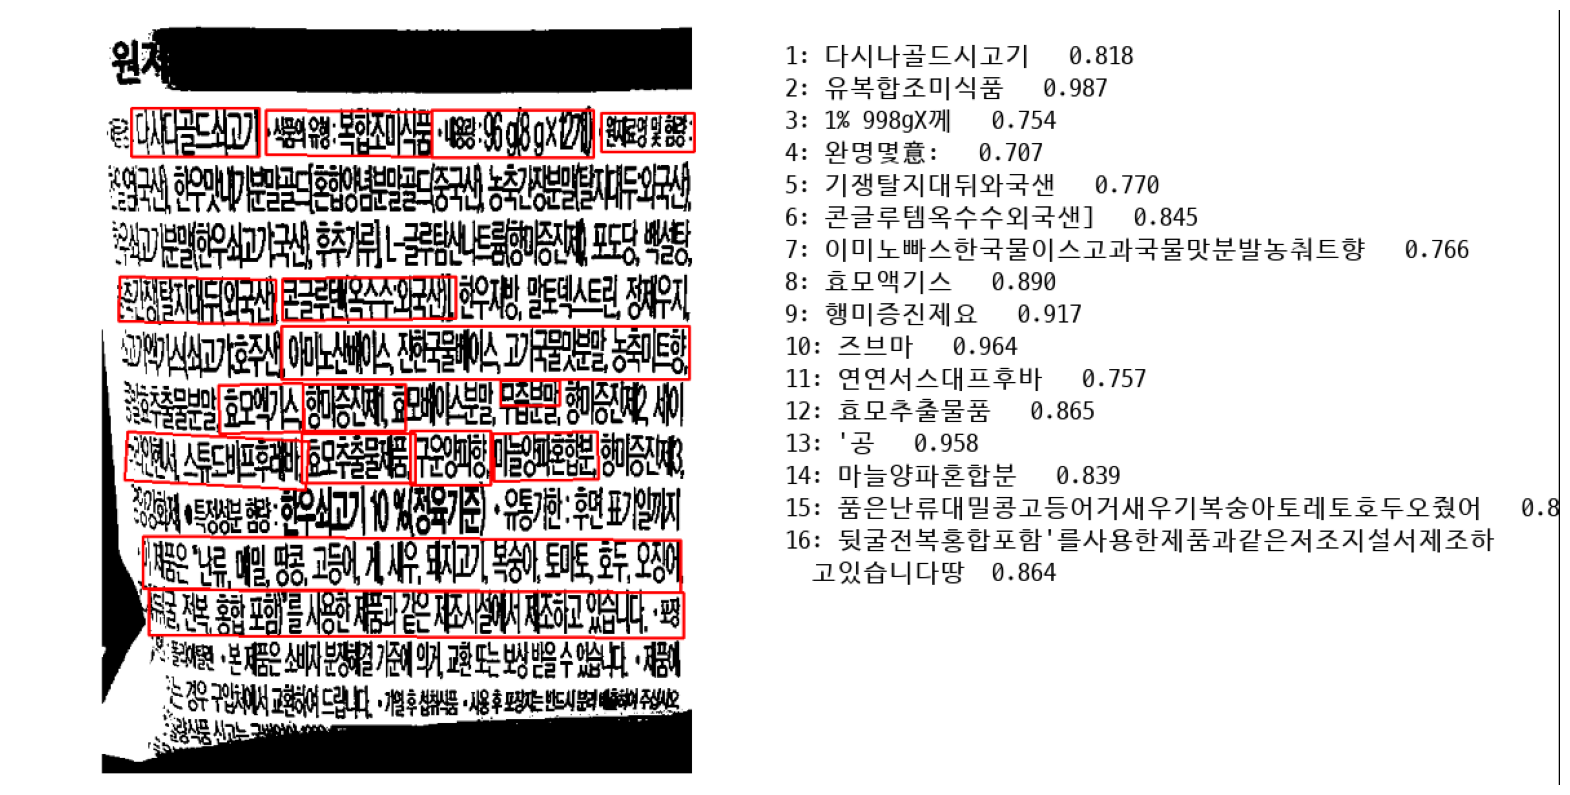

[2024/01/29 21:20:35] ppocr DEBUG: dt_boxes num : 33, elapsed : 0.24713420867919922
[2024/01/29 21:20:36] ppocr DEBUG: cls num  : 33, elapsed : 0.14318037033081055
[2024/01/29 21:20:44] ppocr DEBUG: rec_res num  : 33, elapsed : 8.380644083023071


Original                         Grayscale  \
0                             원재료명                              원재료명   
1                         흥다시다골드쇠고                                 을   
2                      식품의유위복합조미식품                         평다시다골드쇠고기   
3                             내용광:                      '식품의유위복합조미식품   
4                           :688X개                              내용광:   
5                          원치료평및믹량                             :689개   
6                    농축간장분발탈지대두외국산                           원치료평및믹량   
7                      유기분말한우시고기국산                     농축간장분발탈지대두와국산   
8                      콘글루렌옥수수와국산]                        콘글루테옥수수와국산   
9                             한우지방                              한우지방   
10                             저우지                               저우지   
11                         진한국물비이스                              음노샌스   
12                           고국물분발                           진한국물페이스   
13                           효모에기스                            고국물맛분발   
14                          효메이스부발                             효모에기스   
15                              즈마                            효메이스부발   
16                          효모추출물품                                즈마   
17                            구운양항                            효모추출물품   
18                          마늘양혼합분                              구운양항   
19                정회특생분방한우식기0%정육/준                            마늘양혼합분   
20                   :유통기한:후면표기일까지                            행미증진제3   
21                               -                     경분향한우시기0%정육/준   
22      기품은난류메밀콩고둥어게시우되기복아토타토호두오지어                     :유통기한:후면표기일까지   
23  류굴복홍합포함'를사용한제품과같은제조설에서제조하고있습니다                                --   
24                              포장          품은류메밀콩고등어게새우찌기복숭아토마토호두오어   
25   한면본자은쇄자분쟁결기준의거교환또는보상받을수입습니나서품   류굴전복홍합포함'를사용한제품과같은서죠설에서시조하고있습니다   
26                동는경우구입차서교환하여드럽니다                               다포장   
27                         가열후섭취심품  연몰면본지품은쇄자분정결기준의거교환포는보방받을수입습니다서품예   
28            사용후포장자는반드시분리바충하어주십시오                  동는경우구입차서교환하여드럽니다   
29                             신고는                           가열후섭취식품   
30                            None              사용후포장자는반드시분리바충하어주십시오   
31                            None                               신교는   
32                            None                              UOAT   

                              Binary  
0                           다시나골드시고기  
1                            유복합조미식품  
2                          1% 998gX께  
3                              완명몇意:  
4                          기쟁탈지대뒤와국샌  
5                        콘글루템옥수수외국샌]  
6              이미노빠스한국물이스고과국물맛분발농춰트향  
7                              효모액기스  
8                             행미증진제요  
9                                즈브마  
10                          연연서스대프후바  
11                            효모추출물품  
12                                '공  
13                           마늘양파혼합분  
14         품은난류대밀콩고등어거새우기복숭아토레토호두오줬어  
15  뒷굴전복홍합포함'를사용한제품과같은저조지설서제조하고있습니다땅  
16                              None  
17                              None  
18                              None  
19                              None  
20                              None  
21                              None  
22                              None  
23                              None  
24                              None  
25                              None  
26                              None  
27                              None  
28                              None  
29                              None  
30                              None  
31                              None  
32                              None

In [10]:
from paddleocr import PaddleOCR, draw_ocr
import pandas as pd
import cv2
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np

# 이미지 전처리 함수 정의
def grayscale(img):
    return cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

def binary(img):
    gray = grayscale(img)
    _, bin_img = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
    return bin_img

# 전처리 방법 목록
preprocesses = {
    "Original": lambda img: img,
    "Grayscale": grayscale,
    "Binary": binary
}

def perform_ocr_and_visualize(img, ocr_engine, font_path):
    # 이미지가 2차원이면 3차원으로 변환
    if len(img.shape) == 2:
        img = cv2.cvtColor(img, cv2.COLOR_GRAY2RGB)

    # OCR 실행
    result = ocr_engine.ocr(np.array(img), cls=True)

    # 바운딩 박스, 텍스트, 신뢰도 점수 추출
    boxes = [res[0] for line in result for res in line]
    txts = [res[1][0] for line in result for res in line]
    scores = [res[1][1] for line in result for res in line]

    # 바운딩 박스 그리기
    im_show = draw_ocr(Image.fromarray(img), boxes, txts, scores, font_path=font_path)
    im_show = Image.fromarray(im_show)

    # 결과 시각화
    plt.figure(figsize=(20, 18))
    plt.imshow(im_show)
    plt.axis('off')
    plt.show()

# 이미지 경로
img_path = './imgs/rawmaterial1.jpg'

# OCR 인스턴스 생성
ocr = PaddleOCR(lang='korean', use_gpu=False, use_angle_cls=True, drop_score=0.7)

# 이미지 로드
image = Image.open(img_path).convert('RGB')

# 폰트 경로 설정
font_path = '/Users/kimsy/Library/Fonts/D2Coding-Ver1.3.2-20180524-all.ttc'



# 원본 이미지 로드 및 전처리
original_img = cv2.cvtColor(np.array(image), cv2.COLOR_RGB2BGR)

# 결과를 저장할 딕셔너리 초기화
results = {name: [] for name in preprocesses}

# 각 전처리 방법에 대한 OCR 실행
for name, preprocess in preprocesses.items():
    print(f"Processing: {name}")
    # 전처리 이미지
    processed_img = preprocess(np.array(image))  # 수정된 변수명

    # OCR 실행 및 결과 시각화
    perform_ocr_and_visualize(processed_img, ocr, font_path)

    # 전처리된 이미지를 RGB로 변환 (이미 perform_ocr_and_visualize에서 처리함)
    # processed_img = cv2.cvtColor(processed_img, cv2.COLOR_GRAY2RGB) if len(processed_img.shape) == 2 else processed_img

    # 추출된 텍스트
    ocr_result = ocr.ocr(processed_img, cls=True)  # 수정된 변수명 사용
    txts = [res[1][0] for line in ocr_result for res in line]

    # 결과 저장
    results[name] = txts


# 결과를 데이터 프레임으로 변환
df_results = pd.DataFrame.from_dict(results, orient='index').transpose()

# 결과 출력
df_results
